# Preparing Data

In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
observations = 100
x = np.random.uniform(-10, 10, (observations,1))
w = 10
b = 5
noise = np.random.uniform(-1, 1, (observations,1))

y = x*w + b + noise

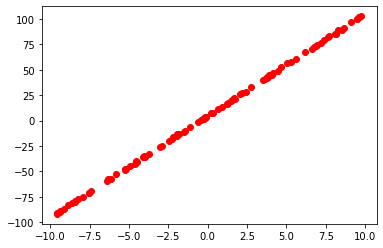

In [127]:
plt.plot(x,y,'ro')
plt.show()

# Preprocessing Data

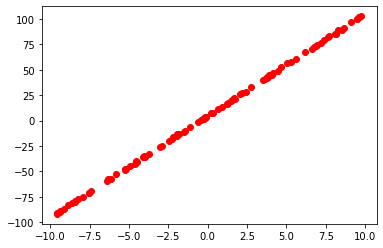

In [128]:
# W and B is get by machine learning
# you can't scale the x and y in this regression example
# scaling usually use in classification with multiple dimension
from sklearn import preprocessing
scaled_inputs = x #preprocessing.scale(x)
scaled_outputs = y #preprocessing.scale(y)

plt.plot(scaled_inputs,scaled_outputs,'ro')
plt.show()

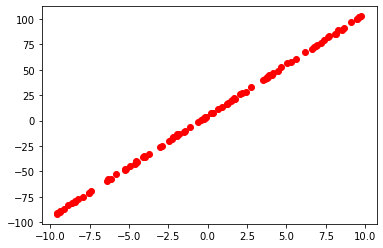

In [129]:
# shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = scaled_outputs[shuffled_indices]

plt.plot(shuffled_inputs,shuffled_targets,'ro')
plt.show()


# Splitting Data


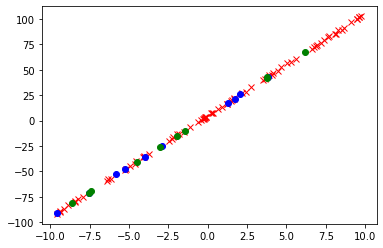

In [130]:
total_samples_count = scaled_inputs.shape[0]
train_samples_count = int(0.8*total_samples_count)
validation_samples_count = int(0.1*total_samples_count)
test_samples_count = total_samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

plt.plot(train_inputs,train_targets,'rx')
plt.plot(validation_inputs, validation_targets, 'bo')
plt.plot(test_inputs, test_targets, 'go')
plt.show()

# Regression Training Model

Epoch 1/10000
1/1 - 0s - loss: 2529.0242 - val_loss: 1388.6820
Epoch 2/10000
1/1 - 0s - loss: 1972.8125 - val_loss: 1067.6600
Epoch 3/10000
1/1 - 0s - loss: 1488.3719 - val_loss: 791.6290
Epoch 4/10000
1/1 - 0s - loss: 1076.3842 - val_loss: 560.5209
Epoch 5/10000
1/1 - 0s - loss: 736.6224 - val_loss: 373.5859
Epoch 6/10000
1/1 - 0s - loss: 467.6496 - val_loss: 229.2400
Epoch 7/10000
1/1 - 0s - loss: 266.5169 - val_loss: 124.9161
Epoch 8/10000
1/1 - 0s - loss: 128.4704 - val_loss: 56.9553
Epoch 9/10000
1/1 - 0s - loss: 46.7513 - val_loss: 20.5860
Epoch 10/10000
1/1 - 0s - loss: 12.6119 - val_loss: 10.0260
Epoch 11/10000
1/1 - 0s - loss: 15.6408 - val_loss: 18.7483
Epoch 12/10000
1/1 - 0s - loss: 44.4395 - val_loss: 39.9183
Epoch 13/10000
1/1 - 0s - loss: 87.5757 - val_loss: 66.9603
Epoch 14/10000
1/1 - 0s - loss: 134.6285 - val_loss: 94.1415
Epoch 15/10000
1/1 - 0s - loss: 177.0945 - val_loss: 117.0361
Epoch 16/10000
1/1 - 0s - loss: 208.9680 - val_loss: 132.7662
Epoch 17/10000
1/1 - 0s

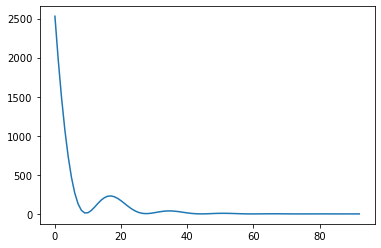

[array([[9.961174]], dtype=float32), array([4.7714515], dtype=float32)]


In [131]:
import tensorflow as tf
input_size = 1
output_size = 1
hidden_layer_size = 20

layer0 = tf.keras.layers.Dense(units=2, activation=tf.keras.activations.relu)
layer1 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([layer1])
#model = tf.keras.Sequential([layer0, layer1])

opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt2 = tf.keras.optimizers.Adam(1)

# metrics=['accuracy'] should be used in classification but not regression
# because the results of regression is hard to exact match, therefore accuracy always give 0
# for classifcation between cat and dog can give accuracy, because you will only output cat and dog but not something in between
#model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer=opt2)



# https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
# For Batch Gradient Descent => batch_size = size of training set
# For Stochastic Gradient Descent => Set batch_size=1
# for Mini-batch Gradient Descent => Set 1 < batch_size < size of traing set

# We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

batch_size = 100
max_epochs = 10000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)

history = model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

plt.plot(history.history['loss'])
plt.show()


weights = layer1.get_weights()
print(weights)


# Prediction


In [132]:
test_loss = model.evaluate(test_inputs, test_targets)
print(test_loss)

print('Prediction: {}'.format(model.predict([10])))

1/1 [==============================] - 0s 935us/step - loss: 0.3785
0.37845224142074585
Prediction: [[104.383194]]
